# Loan Approval Prediction

### Project Overview
This project uses the Loan Approval Prediction dataset from Kaggle to build models that predict loan status (approved or denied).


In [289]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [250]:
import pandas as pd

# Adjust the file name if necessary
data = pd.read_csv("loan_approval_dataset.csv")

# Display the first few rows
data.columns = data.columns.str.strip() # remove whitespace

# First, lets do some preprocessing 

### doing some one hot encoding for education, self_employed, and loan_status

In [253]:
encoder = OneHotEncoder(sparse_output=False)
categorical_features = ['education', 'self_employed', 'loan_status']
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Add encoded features back to the data
data = pd.concat([data, encoded_df], axis=1).drop(categorical_features, axis=1)

# verify that one hot encoding turns them into numerical values
print(data.columns)

# change columns for education and self_employed
data['education'] = data['education_ Graduate']
data = data.drop(['education_ Graduate', 'education_ Not Graduate'], axis=1)
data['self_employed'] = data['self_employed_ Yes']
data = data.drop(['self_employed_ Yes', 'self_employed_ No'], axis=1)

# and of course for loan_status
data['loan_status'] = data['loan_status_ Approved']
data = data.drop(['loan_status_ Approved', 'loan_status_ Rejected'], axis=1)



# lets see if that fixed the trick

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')


### scaling some features 

In [255]:
# List of numerical features to scale
numeric_features = [
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features. numerical features should now have a mean of 0 and std deviation of 1
data[numeric_features] = scaler.fit_transform(data[numeric_features])

### splitting some data

In [257]:
# Define features and target variable
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']              # Target

# Split data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# making sure the number of labels match up
# print("Training set:", X_train.shape, y_train.shape)
# print("Validation set:", X_val.shape, y_val.shape)
# print("Test set:", X_test.shape, y_test.shape)

# train logistic regression model

In [259]:
# gonna be scaling data first
numeric_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                    'residential_assets_value', 'commercial_assets_value',
                    'luxury_assets_value', 'bank_asset_value']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])



# Initialize the model
logistic_model = LogisticRegression(solver='liblinear', max_iter=500)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

# great, now lets validate the model

In [261]:
# predict on the validation set
y_val_pred = logistic_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Validation Metrics for Logistic Regression:
Accuracy: 0.90
Precision: 0.91
Recall: 0.93
F1-Score: 0.92


# looks good! lets see the confusion matrix

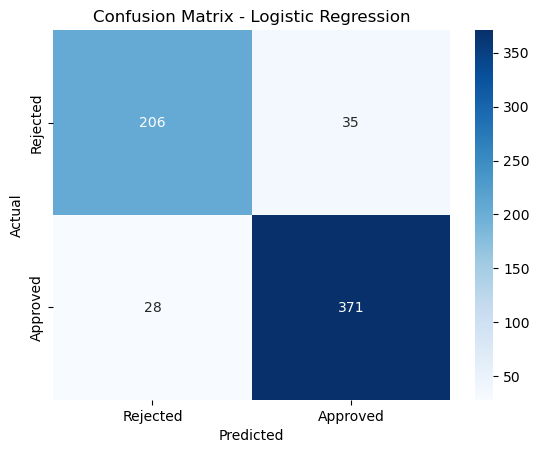

In [263]:
confu_matrix = confusion_matrix(y_val, y_val_pred)

# plot the matrix
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected", "Approved"], 
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Let's move onto other models to see how they compare. lets train an SVM model

In [265]:
# lets fix on a random seed to get the same results everytime we re-run the code
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)

svm_model.fit(X_train, y_train)

SVC(random_state=1)

# validate the SVM model

In [267]:
y_val_pred = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Metrics for SVM:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Validation Metrics for SVM:
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1-Score: 0.77


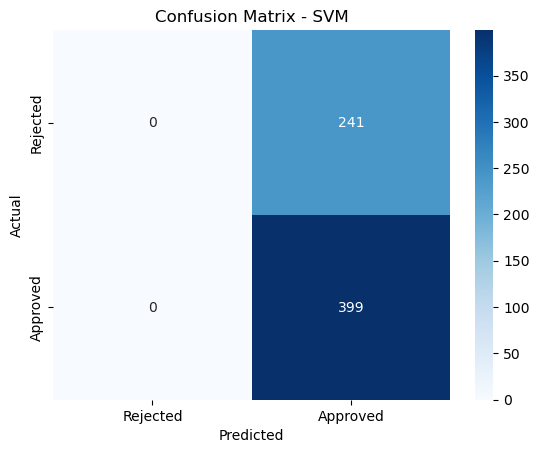

In [268]:
confu_matrix = confusion_matrix(y_val, y_val_pred)

sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected", "Approved"],
            yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# interesting... it looks like the SVM model performed worse than the logistic regression model. Lets tune it!
# TODO: tune the SVM to increase the accurancy score

# Lets use a neural network now, building it

In [305]:
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # First hidden layer
    Dense(16, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, 
                       validation_data=(X_val, y_val), 
                       epochs=20, 
                       batch_size=32, 
                       verbose=1)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5752 - loss: 64.6870 - val_accuracy: 0.4406 - val_loss: 0.8925
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6023 - loss: 0.7067 - val_accuracy: 0.6641 - val_loss: 0.5936
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7038 - loss: 0.6102 - val_accuracy: 0.8094 - val_loss: 0.5652
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7022 - loss: 0.6454 - val_accuracy: 0.5375 - val_loss: 0.7491
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7216 - loss: 0.6378 - val_accuracy: 0.7641 - val_loss: 0.5347
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7361 - loss: 0.5604 - val_accuracy: 0.7203 - val_loss: 0.5515
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6753 - loss: 0.8624 - val_accuracy: 0.7078 - val_loss: 0.5731
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7427 - loss: 0.5524 - val_accuracy: 0.7

# validate the model

In [307]:
y_val_pred_probs = nn_model.predict(X_val)  # Probabilities
y_val_pred = (y_val_pred_probs > 0.5).astype("int32").flatten()  # Convert to binary predictions
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Validation Metrics for Neural Network:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
Validation Metrics for Neural Network:
Accuracy: 0.89
Precision: 0.98
Recall: 0.83
F1-Score: 0.90


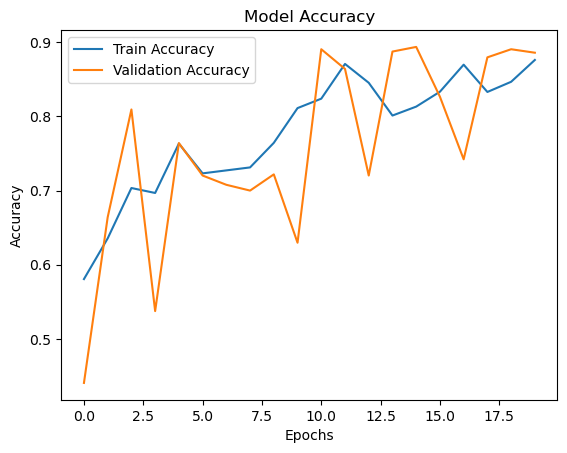

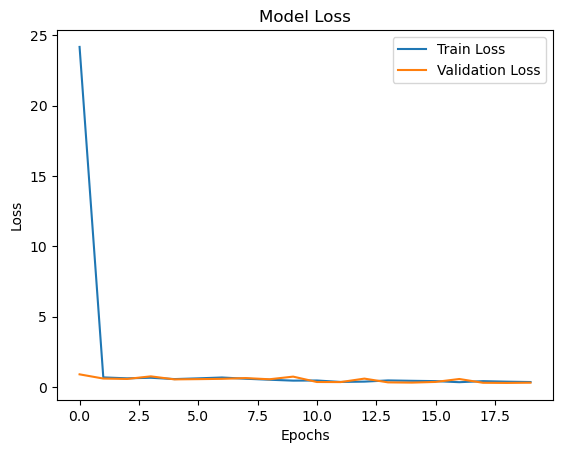

In [309]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()